In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import datetime

In [103]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11,7)})

#const
path = os.path.join('..', 'data')
cols = ['Date', 'Time']

### Data cleaning

In [104]:
men_marathon = pd.read_csv(os.path.join(path, 'Men marathon.csv'))
men10km = pd.read_csv(os.path.join(path, 'Men 10km.csv'))
men100m = pd.read_csv(os.path.join(path, 'Men 100m.csv'))
men400m = pd.read_csv(os.path.join(path, 'Men 400m.csv'))

women_marathon = pd.read_csv(os.path.join(path, 'Women marathon.csv'))
women10km = pd.read_csv(os.path.join(path, 'Women 10km.csv'))
women100m = pd.read_csv(os.path.join(path, 'Women 100m.csv'))
women400m = pd.read_csv(os.path.join(path, 'Women 400m.csv'))

women_outdoor = pd.read_csv(os.path.join(path, 'Women outdoor.csv'))
men_outdoor = pd.read_csv(os.path.join(path, 'Men outdoor.csv'))

In [98]:
men_outdoor

,Competitor,Country,Date,Discipline,DOB,Perf,Progression,Venue,Wind
0,Aries MERRITT,USA,2012-09-07 00:00:00,110 Metres Hurdles,1985-07-24 00:00:00,12.80,NaN,"Boudewijnstadion, Bruxelles (BEL)",'+0.3
1,Armand DUPLANTIS,SWE,2022-07-24 00:00:00,Pole Vault,1999-11-10 00:00:00,6.21,NaN,"Hayward Field, Eugene, OR (USA)",NaN
2,Armand DUPLANTIS,SWE,2023-02-25 00:00:00,Pole Vault,1999-11-10 00:00:00,6.22 *(i),NaN,"Maison des Sports, Clermont-Ferrand (FRA)",NaN
3,Berihu AREGAWI,ETH,2021-12-31 00:00:00,5 Kilometres,2001-02-28 00:00:00,12:49,NaN,Barcelona (ESP),NaN
4,Bernardo SEGURA,MEX,1994-05-07 00:00:00,"20,000 Metres Race Walk",1970-02-11 00:00:00,1:17:25.6h,NaN,Fana (NOR),NaN
5,CJ ALBERTSON,USA,2022-10-08 00:00:00,50 Kilometres,1993-10-11 00:00:00,2:38:43 *,NaN,"San Francisco, CA (USA)",NaN
6,Daniel KOMEN,KEN,1996-09-01 00:00:00,3000 Metres,1976-05-17 00:00:00,7:20.67,NaN,Rieti (ITA),NaN
7,David RUDISHA,KEN,2012-08-09 00:00:00,800 Metres,1988-12-17 00:00:00,1:40.91,NaN,"Olympic Stadium, London (GBR)",NaN
8,Eliud KIPCHOGE,KEN,2022-09-25 00:00:00,Marathon,1984-11-05 00:00:00,2:01:09,NaN,Berlin (GER),NaN
9,Hicham EL GUERROUJ,MAR,1998-07-14 00:00:00,1500 Metres,1974-09-14 00:00:00,3:26.00,NaN,"Stadio Olimpico, Roma (ITA)",NaN


In [80]:
women_outdoor

,Competitor,Country,Date,Discipline,DOB,Perf,Progression,Venue,Wind
0,Agnes Jebet TIROP,KEN,2021-09-12 00:00:00,10 Kilometres,1995-10-23 00:00:00,30:01 Wo,NaN,Herzogenaurach (GER),NaN
1,Anita WŁODARCZYK,POL,2016-08-28 00:00:00,Hammer Throw,1985-08-08 00:00:00,82.98,NaN,"Stadion PGE Narodowy, Warszawa (POL)",NaN
2,Austra SKUJYTĖ,LTU,2005-04-15 00:00:00,Decathlon,1979-08-12 00:00:00,8358,NaN,"Columbia, MO (USA)",NaN
3,Barbora ŠPOTÁKOVÁ,CZE,2008-09-13 00:00:00,Javelin Throw,1981-06-30 00:00:00,72.28,NaN,"Gottlieb-Daimler Stadion, Stuttgart (GER)",NaN
4,Beatrice CHEPKOECH,KEN,2018-07-20 00:00:00,3000 Metres Steeplechase,1991-07-06 00:00:00,8:44.32,NaN,"Stade Louis II, Monaco (MON)",NaN
5,Brigid KOSGEI,KEN,2019-10-13 00:00:00,Marathon,1994-02-20 00:00:00,2:14:04 Mx,NaN,"Chicago, IL (USA)",NaN
6,Desiree LINDEN,USA,2021-04-13 00:00:00,50 Kilometres,1983-07-26 00:00:00,2:59:54 Mx,NaN,"Dorena Lake, Oregon (USA)",NaN
7,Ejgayehu TAYE,ETH,2021-12-31 00:00:00,5 Kilometres,2000-02-10 00:00:00,14:19 Mx,NaN,Barcelona (ESP),NaN
8,Emane SEIFU,ETH,2023-02-26 00:00:00,50 Kilometres,NaN,3:00:30 Wo *,NaN,Gqeberha (RSA),NaN
9,Florence GRIFFITH-JOYNER,USA,1988-07-16 00:00:00,100 Metres,1959-12-21 00:00:00,10.49,NaN,"Indianapolis, IN (USA)",0.0


In [109]:
def clean_data(filename):
    if filename == 'Men 100m.csv':
        df = pd.read_csv(os.path.join(path, filename))[['Mark', 'Date']]
        df = df.rename(columns={'Mark':'Time'})
    elif filename == 'Men indoor.csv' or filename == 'Women indoor.csv' or filename == 'Women outdoor.csv' or filename == 'Men outdoor.csv':
        df = pd.read_csv(os.path.join(path, filename))[['Perf', 'Date']]
        df = df.rename(columns={'Perf':'Time'})
    else:
        df = pd.read_csv(os.path.join(path, filename))[['Date', 'Time']]
        
    df.dropna(subset=['Time'], axis=0, how='all', inplace=True)
    
    if filename in ('Men 10km.csv', 'Women 10km.csv', 'Men marathon.csv', 'Women marathon.csv', 'Men indoor.csv','Women indoor.csv','Women outdoor.csv','Men outdoor.csv'):
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{2}.\d{0,2})', expand=False)
    else:
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{1,4})', expand=False)
    
    '''if filename in ('Men marathon.csv', 'Women marathon.csv', 'Men 400m.csv', 'Women 100m.csv', 'Women 400m.csv'):
        df['Date'] = df['Date'].str.extract(r'^(\w{3,9}\s\d{1,22},\d{4})', expand=False)
        print(df.head())
        #df['Date'] = pd.to_datetime(df['Date'])
    else:
        df['Date'] = pd.to_datetime(df['Date'])
    
    #df = df.sort_values(by='Date')
    '''
    return df

In [110]:
def clean_data2(filename):
    if filename == 'Men 100m.csv':
        df = pd.read_csv(os.path.join(path, filename))[['Mark', 'Date']]
        df = df.rename(columns={'Mark':'Time'})
    elif filename == 'Men indoor.csv' or filename == 'Women indoor.csv' or filename == 'Women outdoor.csv' or filename == 'Men outdoor.csv':
        df = pd.read_csv(os.path.join(path, filename))[['Perf', 'Date']]
        df = df.rename(columns={'Perf':'Time'})
    else:
        df = pd.read_csv(os.path.join(path, filename))[['Date', 'Time']]
        
    df.dropna(subset=['Time'], axis=0, how='all', inplace=True)
    
    if filename in ('Men 10km.csv', 'Women 10km.csv', 'Men marathon.csv', 'Women marathon.csv'):
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{2}.\d{0,2})', expand=False)
    else:
        df['Time'] = df['Time'].str.extract(r'^(\d{1,2}.\d{1,4})', expand=False)
    
    '''if filename in ('Men marathon.csv', 'Women marathon.csv', 'Men 400m.csv', 'Women 100m.csv', 'Women 400m.csv'):
        df['Date'] = df['Date'].str.extract(r'^(\w{3,9}\s\d{1,22},\d{4})', expand=False)
        print(df.head())
        #df['Date'] = pd.to_datetime(df['Date'])
    else:
        df['Date'] = pd.to_datetime(df['Date'])
    
    #df = df.sort_values(by='Date')
    '''
    return df

In [111]:
men_marathon = clean_data('Men marathon.csv')
men10km = clean_data('Men 10km.csv')
men100m = clean_data('Men 100m.csv')
men400m = clean_data('Men 400m.csv')

women_marathon = clean_data('Women marathon.csv')
women10km = clean_data('Women 10km.csv')
women100m = clean_data('Women 100m.csv')
women400m = clean_data('Women 400m.csv')

men_indoor = clean_data('Men indoor.csv')
women_indoor = clean_data('Women indoor.csv')
men_outdoor = clean_data('Men outdoor.csv')
women_outdoor = clean_data('Women outdoor.csv')

men_outdoor_sh = clean_data2('Men outdoor.csv')
women_outdoor_sh = clean_data2('Women outdoor.csv')

In [107]:
men_outdoor

,Time,Date
0,NaN,2012-09-07 00:00:00
1,NaN,2022-07-24 00:00:00
2,6.22,2023-02-25 00:00:00
3,NaN,2021-12-31 00:00:00
4,1:17:25,1994-05-07 00:00:00
5,2:38:43,2022-10-08 00:00:00
6,7:20.67,1996-09-01 00:00:00
7,1:40.91,2012-08-09 00:00:00
8,2:01:09,2022-09-25 00:00:00
9,3:26.00,1998-07-14 00:00:00


* marathon

In [11]:
women_marathon.head()[cols]

,Date,Time
0,"April 13, 2003",2:15:25
1,"April 17, 1983",2:25:28
2,"April 17, 2005",2:17:42
3,"April 18, 1983",2:22:43
4,"April 19, 1998",2:20:47


In [12]:
men_marathon.head()[cols]

,Date,Time
0,"April 14, 2002",2:05:38
1,"April 17, 1988",2:06:50
2,"April 19, 1947",2:25:39
3,"April 20, 1985",2:07:12
4,"April 26, 1980",2:09:01


* 10km

In [13]:
women10km.head()[cols]

,Date,Time
0,12.08.2016,29:17.45
1,1967-03-26,38:06.4
2,1975-08-20,34:01.4
3,1966,39:25.0
4,1966,39:10.0


In [14]:
men10km.head()[cols]

,Date,Time
0,1904-11-05,31:02.4
1,18.08.1989,27:08.23
2,13.07.1973,27:30.8
3,01.06.1954,28:54.2
4,01.11.1953,29:01.6


* 100m

In [15]:
women100m.head()[cols]

,Date,Time
0,"July 25, 1976[1]",11.01
1,"July 2, 1967[1]",11.1
2,"October 14, 1968",11.1
3,"June 2, 1928",12.0
4,"July 18, 1970[1]",11.0


In [16]:
men100m.head()[cols]

,Date,Time
0,1960-06-21 00:00:00,10.0
1,2007-09-09 00:00:00,9.74
2,2006-06-11 00:00:00,9.77
3,2005-06-14 00:00:00,9.77
4,2006-08-18 00:00:00,9.77


* 400m

In [17]:
women400m.head()[cols]

,Date,Time
0,9 May 1976[1],49.77
1,18 September 1969[1],51.7
2,22 June 1974[1],49.9
3,22 June 1976[1],49.75
4,29 July 1976[1],49.29


In [18]:
men400m.head()[cols]

,Date,Time
0,"May 25, 1963[1]",44.9
1,"June 19, 1936[1]",46.1
2,"March 26, 1932[1]",46.4
3,"August 5, 1932[1]",46.2
4,"August 17, 1988[1]",43.29


,Time,Date
0,6.20,2022-03-20 00:00:00
1,6.22,2023-02-25 00:00:00
2,6645,2012-03-10 00:00:00
3,2:14,2016-02-17 00:00:00
4,8.79,1984-01-27 00:00:00
5,6.34,2018-02-18 00:00:00
6,7:24,1998-02-06 00:00:00
7,5.56,1996-02-09 00:00:00
8,19.92,1996-02-18 00:00:00
9,7.29,2021-02-24 00:00:00


-------

In [134]:
def minutes(time_string):
    m,s = time_string.split(':')
    return round((60*int(m)+float(s))/60,2)

def minutes2(time_string):
    h,m,s = time_string.split(':')
    return round((int(h)*3600+60*int(m)+float(s))/60,2)

women_marathon['Time'][39] = '5:40:00'

In [20]:
for x in [men10km,women10km]:
    for i in range(len(x['Time'])):
        x['Time'][i] = seconds(str(x['Time'][i]))   

In [21]:
for x in [men_marathon,women_marathon]:
    for i in range(len(x['Time'])):
        x['Time'][i] = seconds2(str(x['Time'][i]))     

In [73]:
men_outdoor['Time'][12]

'57:31'

### BEST

In [23]:
best_men_marathon = float(min(men_marathon['Time']))
best_men10km = float(min(men10km['Time']))
best_men100m = float(min(men100m['Time']))
best_men400m = float(min(men400m['Time']))

best_women_marathon = float(min(women_marathon['Time']))
best_women10km = float(min(women10km['Time']))
best_women100m = float(min(women100m['Time']))
best_women400m = float(min(women400m['Time']))

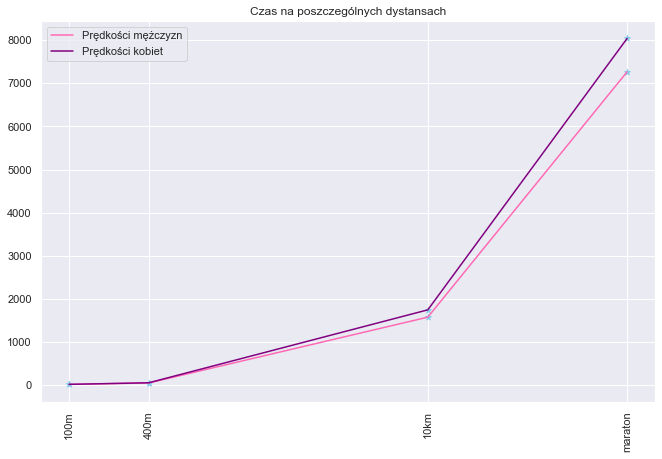

In [33]:
best_men = np.array([best_men100m,best_men400m,best_men10km,best_men_marathon])
best_women = np.array([best_women100m,best_women400m,best_women10km,best_women_marathon])
distance = [100,300,10**3,15*100]
plt.plot(distance, best_men, color='hotpink',label='Prędkości mężczyzn')
plt.plot(distance, best_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, best_men, color='skyblue',marker='*')
plt.scatter(distance, best_women, color='skyblue',marker='*')
plt.xticks(distance, ['100m','400m','10km','maraton'],rotation=90)
plt.legend()
plt.title('Czas na poszczególnych dystansach')
plt.savefig('Czas_na_dys')
plt.show()

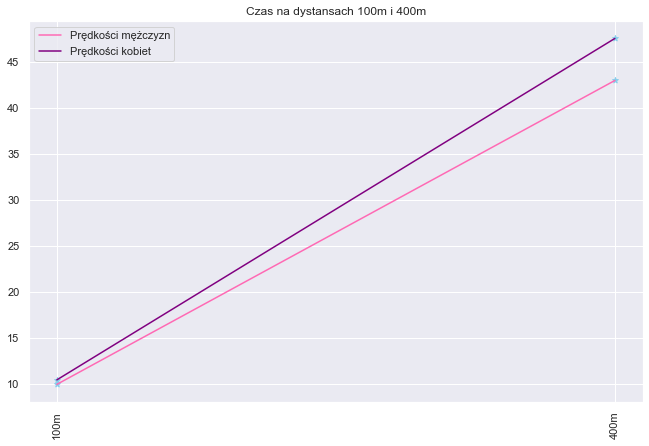

In [25]:
best_men = np.array([best_men100m,best_men400m])
best_women = np.array([best_women100m,best_women400m])
distance = [100,1100]
plt.plot(distance, best_men, color='hotpink',label='Prędkości mężczyzn')
plt.plot(distance, best_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, best_men, color='skyblue',marker='*')
plt.scatter(distance, best_women, color='skyblue',marker='*')
plt.xticks(distance, ['100m','400m'],rotation=90)
plt.legend()
plt.title('Czas na dystansach 100m i 400m')
plt.savefig('Czas_na_dys_100_400')
plt.show()

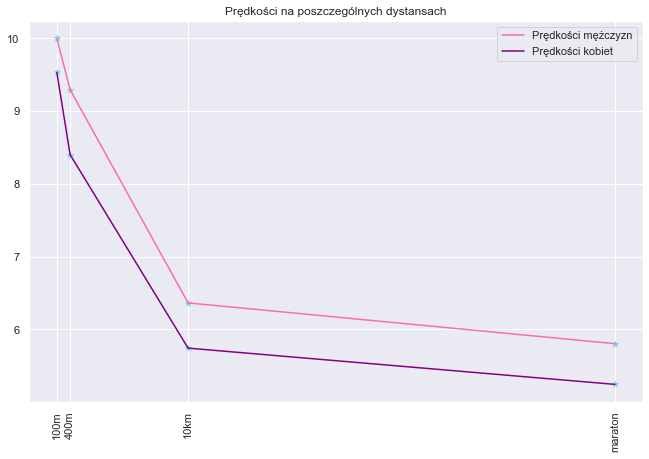

In [26]:
best_men = np.array([best_men100m,best_men400m,best_men10km,best_men_marathon])
best_women = np.array([best_women100m,best_women400m,best_women10km,best_women_marathon])
distance = [100,1100,10**4,42.194*10**3]
tempo_men = [100/float(best_men100m),400/float(best_men400m),10**4/float(best_men10km),(42.194*10**3)/float(best_men_marathon)]
tempo_women = [100/float(best_women100m),400/float(best_women400m),10**4/float(best_women10km),(42.194*10**3)/float(best_women_marathon)]
plt.plot(distance, tempo_men, color='hotpink', label='Prędkości mężczyzn')
plt.plot(distance, tempo_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, tempo_men, color='skyblue', marker='*')
plt.scatter(distance, tempo_women, color='skyblue', marker='*')
plt.xticks(distance, ['100m','400m','10km','maraton'],rotation=90)
plt.legend()
plt.title('Prędkości na poszczególnych dystansach')
plt.savefig('Pred_na_dys')
plt.show()

__________

In [211]:
from datetime import datetime
best_men = ['0:9.58','0:19.19','0:43.03','1:40.91','2:11.96','3:26.00','3:43.13','4:44.79','7:20.61','12:49.00','26:11.00','57:31.00','2:01:09','2:38:43','6:09:14']
best_women = ['0:10.49','0:21.34','0:47.60','1:53.28','2:28.98','3:50.07','3:50.07','5:21.56','8:06.11','14:19.00','30:01.00','1:02:52.00','2:14:04','2:59:54','6:33:11']

distance_real = [100,200,400,800,10**3,15*100,1.6*10**3,2*10**3,3*10**3,5*10**3,10**4,21.0975*10**3,42.195*10**3,50*10**3,10**5]
distance = [1*i for i in range(len(best_men))]

In [212]:
best_men = list(map(minutes,best_men[:-3])) + list(map(minutes2,best_men[-3:]))
best_women = list(map(minutes,best_women[:-4])) + list(map(minutes2,best_women[-4:]))

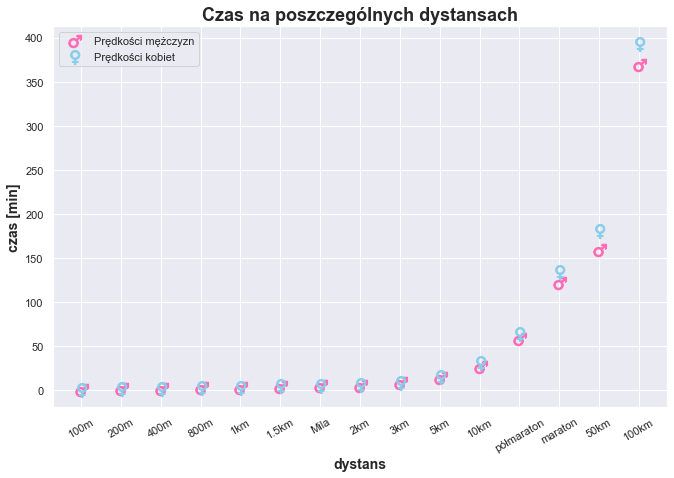

In [228]:
#plt.plot(distance, best_men, color='hotpink',label='Prędkości mężczyzn')
#plt.plot(distance, best_women, color='purple',label='Prędkości kobiet')
plt.scatter(distance, best_men, color='hotpink',marker=u'$\u2642$',label='Prędkości mężczyzn',s=200)
plt.scatter(distance, best_women, color='skyblue',marker=u'$\u2640$',label='Prędkości kobiet',s=200)
plt.xticks(distance, ['100m','200m','400m','800m','1km','1.5km','Mila','2km','3km','5km','10km','półmaraton','maraton','50km','100km'],rotation=30)
plt.legend()
plt.xlabel('dystans',fontsize=14,fontweight='bold')
plt.ylabel('czas [min]',fontsize=14,fontweight='bold')
plt.title('Czas na poszczególnych dystansach',fontweight='bold',fontsize=18)
plt.savefig('Czas_na_dys')
plt.show()

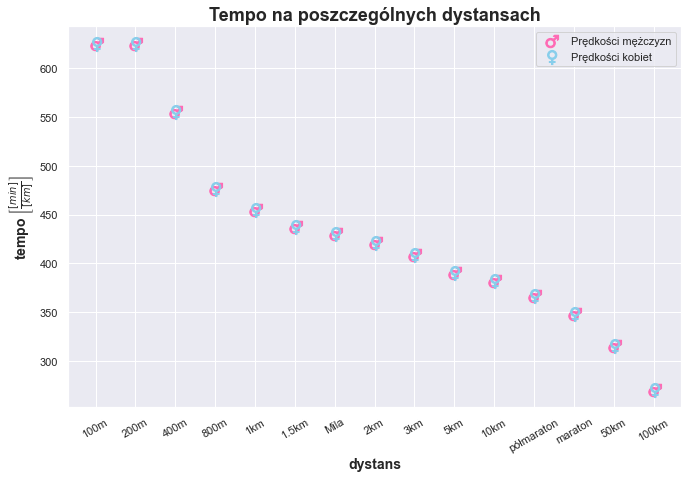

In [231]:
tempo_men = [distance_real[i]/best_men[i] for i in range(len(best_men))]
tempo_women = [distance_real[i]/best_men[i] for i in range(len(best_men))]
plt.scatter(distance, tempo_men, color='hotpink',marker=u'$\u2642$',label='Prędkości mężczyzn',s=200)
plt.scatter(distance, tempo_women, color='skyblue',marker=u'$\u2640$',label='Prędkości kobiet',s=200)
plt.xticks(distance, ['100m','200m','400m','800m','1km','1.5km','Mila','2km','3km','5km','10km','półmaraton','maraton','50km','100km'],rotation=30)
plt.xlabel('dystans',fontsize=14,fontweight='bold')
plt.ylabel(r'tempo $\left[\frac{[min]}{[km]}\right]$',fontsize=14,fontweight='bold')
plt.legend()
plt.title('Tempo na poszczególnych dystansach',fontweight='bold',fontsize=18)
plt.savefig('Pred_na_dys')
plt.show()

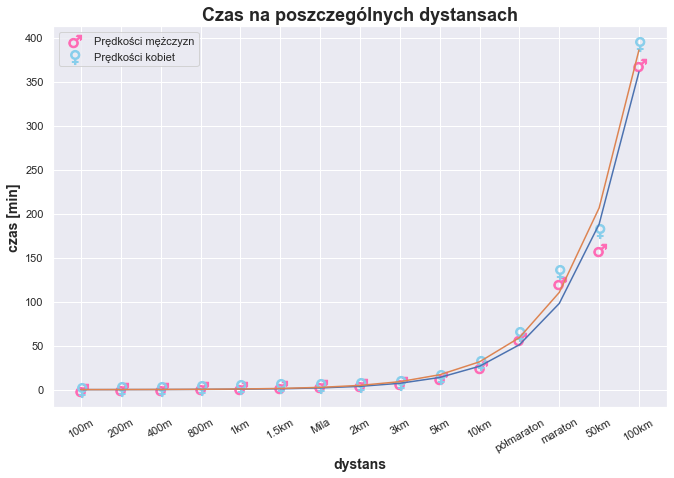

In [250]:
from scipy.optimize import curve_fit
f = lambda x,a,b: np.exp(a*x+b)
fit = curve_fit(f,distance,best_men)
fit2 = curve_fit(f,distance,best_women)
a_men, b_men = fit[0]
a_women, b_women = fit2[0]
plt.scatter(distance, best_men, color='hotpink',marker=u'$\u2642$',label='Prędkości mężczyzn',s=200)
plt.scatter(distance, best_women, color='skyblue',marker=u'$\u2640$',label='Prędkości kobiet',s=200)
plt.plot(distance,[f(i,a_men,b_men) for i in distance])
plt.plot(distance,[f(i,a_women,b_women) for i in distance])
plt.xticks(distance, ['100m','200m','400m','800m','1km','1.5km','Mila','2km','3km','5km','10km','półmaraton','maraton','50km','100km'],rotation=30)
plt.legend()
plt.xlabel('dystans',fontsize=14,fontweight='bold')
plt.ylabel('czas [min]',fontsize=14,fontweight='bold')
plt.title('Czas na poszczególnych dystansach',fontweight='bold',fontsize=18)
plt.show()

In [248]:
fit

(array([   0.9999511 , -983.9361276 ,  984.93693268]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

In [210]:
0.16/0.1

1.5999999999999999

In [208]:
9.58/60

0.15966666666666668